https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html

Importa las bibliotecas necesarias

In [1]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

# Though the following import is not directly being used, it is required
# for 3D projection to work with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets
from sklearn.cluster import KMeans

Carga el conjunto de datos Iris usando datasets.load_iris(), y asigna las características a X y las etiquetas a y.

In [2]:
np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

Define una lista de estimadores que contienen diferentes instancias del algoritmo K-Means con diferentes configuraciones, incluyendo el número de clusters y opciones de inicialización.

In [3]:
estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

Itera sobre los estimadores definidos y crea subgráficos 3D para cada uno con diferentes configuraciones de clustering.  
Dentro de cada bucle:  
- Ajusta el modelo K-Means a los datos con est.fit(X).
- Obtiene las etiquetas de cluster asignadas por el modelo con est.labels_.
- Usa ax.scatter() para trazar los puntos de datos en el espacio 3D, donde cada punto está coloreado según su etiqueta de cluster.
- Configura los ejes y títulos para cada subgráfico.

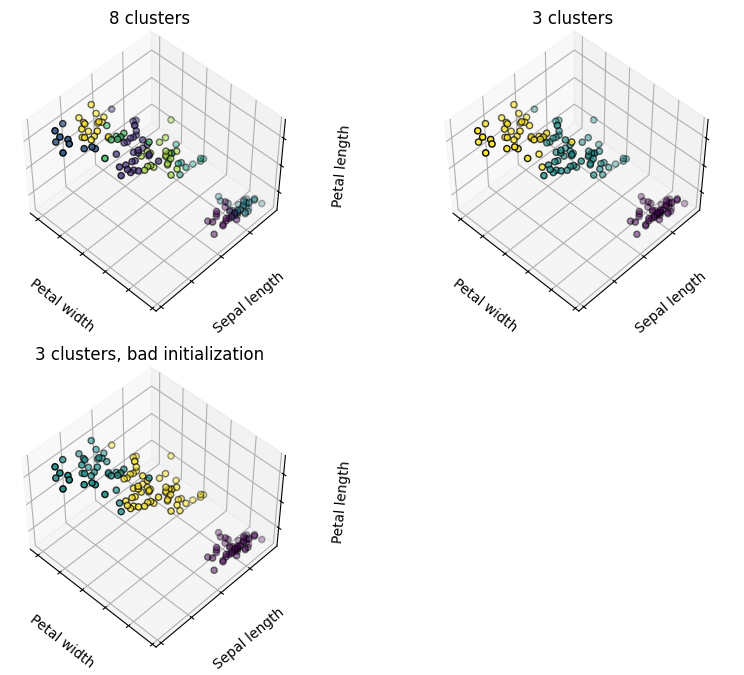

In [4]:
fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(title)


Agrega un cuarto subgráfico que muestra la "verdad fundamental", es decir, las etiquetas reales del conjunto de datos Iris.   
Dentro de este subgráfico:  
- Usa ax.scatter() para trazar los puntos de datos, pero esta vez, cada punto está coloreado según su etiqueta real.
- Agrega texto para etiquetar los grupos de puntos con los nombres de las especies de iris.
- Configura los ejes y títulos para este subgráfico.

In [5]:
# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")

Text(0.5, 0.92, 'Ground Truth')

Ajusta los espacios entre los subgráficos con plt.subplots_adjust()

In [6]:
plt.subplots_adjust(wspace=0.25, hspace=0.25)

<Figure size 640x480 with 0 Axes>

Finalmente, muestra la figura con plt.show()

In [7]:
plt.show()